In [446]:
import numpy as np
import pandas as pd

In [447]:
df = pd.read_csv('Train_Dataset.csv')

In [448]:
df

,Month,AvgSunspotCount
0,01/01/1749,97
1,02/01/1749,104
2,03/01/1749,117
3,04/01/1749,93
4,05/01/1749,142
...,...,...
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34


In [449]:
df['AvgSunspotCount'] = df['AvgSunspotCount'].replace(0, np.nan)

In [450]:
df['AvgSunspotCount'] = df['AvgSunspotCount'].fillna(method='ffill')

In [451]:
df.tail(2)

,Month,AvgSunspotCount
3142,11-01-2010,34.0
3143,12-01-2010,25.0


In [452]:
df.shape

(3144, 2)

In [453]:
df1 = pd.read_csv('Test.csv')

In [454]:
df1.shape

(120, 1)

In [455]:
df1.head(3)

,Month
0,01-01-2011
1,02-01-2011
2,03-01-2011


In [456]:
df1.tail(3)

,Month
117,10-01-2020
118,11-01-2020
119,12-01-2020


In [457]:
date = pd.date_range(start='1/1/1749',end='31/12/2010',freq='M')
date

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', length=3144, freq='M')

In [458]:
df['Time_Stamp'] = pd.DataFrame(date)

In [459]:
df.drop('Month',1,inplace=True)

In [460]:
df.head(2)

,AvgSunspotCount,Time_Stamp
0,97.0,1749-01-31
1,104.0,1749-02-28


In [461]:
df = df.set_index('Time_Stamp')

In [462]:
df.head(2)

,AvgSunspotCount
Time_Stamp,
1749-01-31,97.0
1749-02-28,104.0


In [463]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [464]:
rcParams['figure.figsize'] = 15,6

<AxesSubplot:xlabel='Time_Stamp'>

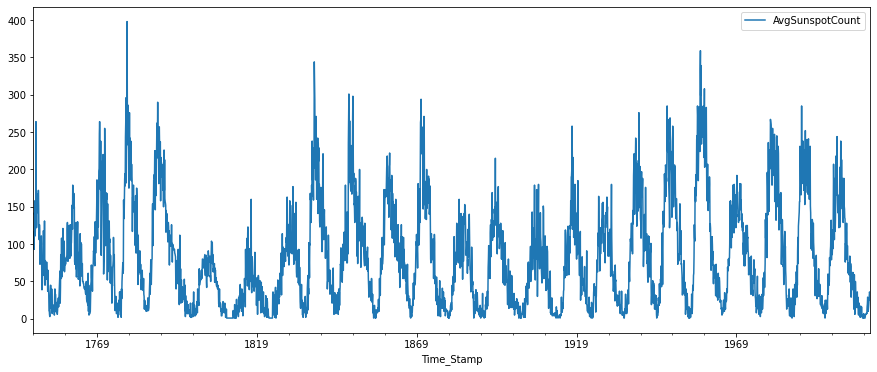

In [465]:
df.plot()

<AxesSubplot:xlabel='AvgSunspotCount'>

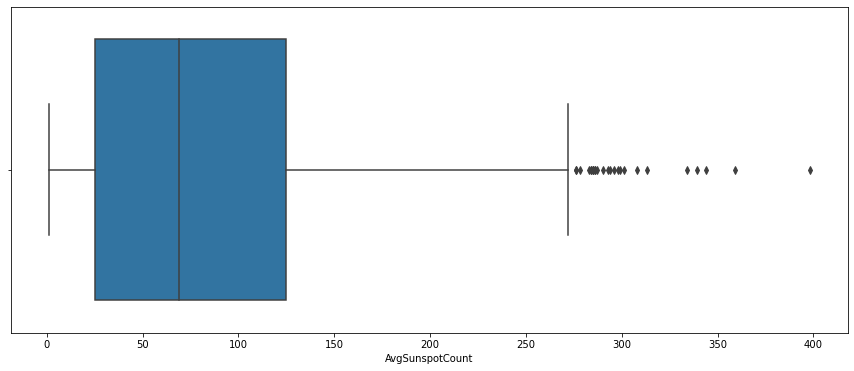

In [466]:
sns.boxplot(df.AvgSunspotCount)

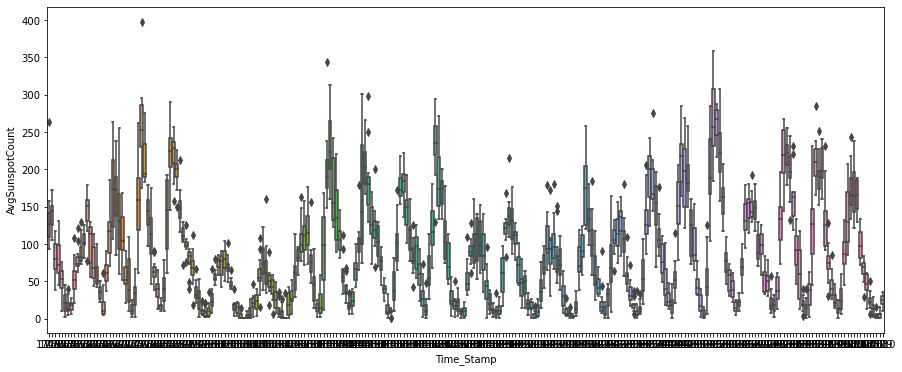

In [467]:
sns.boxplot(x = df.index.year,y = df['AvgSunspotCount'])
plt.show();

In [468]:
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from statsmodels.tsa.api                  import  ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

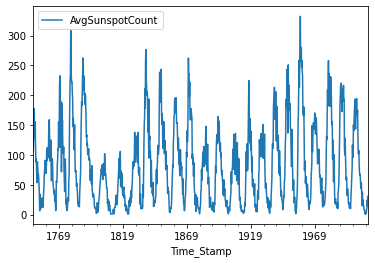

In [469]:
df_quarter = df.resample('Q').mean()
df_quarter.plot()
plt.show()

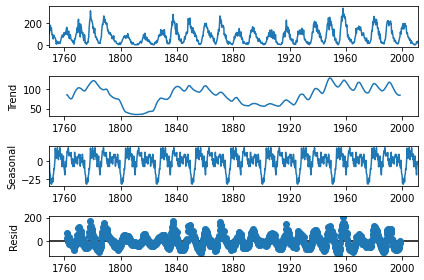

In [470]:
add_decomp = seasonal_decompose(df_quarter,model='additive',period=100)
add_decomp.plot();

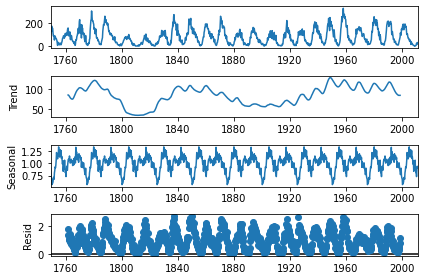

In [471]:
multi_decomp = seasonal_decompose(df_quarter,model='multiplicative',period=100)
multi_decomp.plot();

In [472]:
observations= df_quarter.values
test_result = adfuller(observations)

In [473]:
test_result

(-10.310109493765864,
 3.2018911105180266e-18,
 11,
 1036,
 {'1%': -3.436677776748241,
  '5%': -2.8643338457318848,
  '10%': -2.5682575592567196},
 9260.695655959546)

In [474]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -10.310109
p-value: 0.000000
Critical Values:
	1%: -3.43668
	5%: -2.86433
	10%: -2.56826


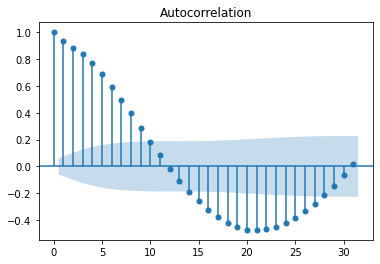

In [475]:
plot_acf(df_quarter);

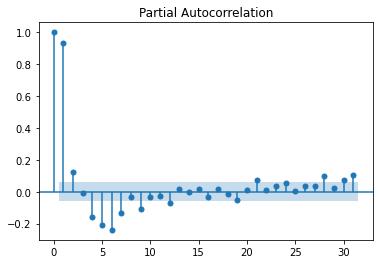

In [476]:
plot_pacf(df_quarter);

In [477]:
df_quarter.shape

(1048, 1)

In [478]:
train = df_quarter.iloc[:10]
test = df_quarter.iloc[1007:]

In [479]:
print(train.shape)
print(test.shape)

(1007, 1)
(41, 1)


In [482]:
import statsmodels.api as sm

In [716]:
model = sm.tsa.statespace.SARIMAX(df_quarter,
                                order=(2,0,10),
                                seasonal_order=(1,1,1,43),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                       SARIMAX Results                                       
Dep. Variable:                       AvgSunspotCount   No. Observations:                 1048
Model:             SARIMAX(2, 0, 10)x(1, 1, [1], 43)   Log Likelihood               -4326.572
Date:                               Thu, 25 Mar 2021   AIC                           8683.144
Time:                                       19:50:52   BIC                           8756.007
Sample:                                   03-31-1749   HQIC                          8710.904
                                        - 12-31-2010                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9030      0.023     82.960      0.000       1.858       1.948
ar.L2      

In [717]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [718]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

In [719]:
SARIMA_predictions

Time_Stamp
2000-12-31    181.851315
2001-03-31    160.140047
2001-06-30    163.595165
2001-09-30    150.823404
2001-12-31    155.363050
2002-03-31    181.734728
2002-06-30    164.503114
2002-09-30    159.564143
2002-12-31    160.983267
2003-03-31    139.102644
2003-06-30    105.895791
2003-09-30    103.252283
2003-12-31     93.113787
2004-03-31     62.183652
2004-06-30     55.262244
2004-09-30     56.844039
2004-12-31     58.456456
2005-03-31     53.449196
2005-06-30     41.771133
2005-09-30     45.902873
2005-12-31     43.170066
2006-03-31     33.301473
2006-06-30     19.984242
2006-09-30     35.062579
2006-12-31     21.580414
2007-03-31     19.421460
2007-06-30     21.777514
2007-09-30     18.416978
2007-12-31     17.252998
2008-03-31     10.134960
2008-06-30     19.253103
2008-09-30      4.791995
2008-12-31     16.078320
2009-03-31     18.077242
2009-06-30     14.035303
2009-09-30     15.399507
2009-12-31     19.724456
2010-03-31     32.923055
2010-06-30     37.965201
2010-09-30    

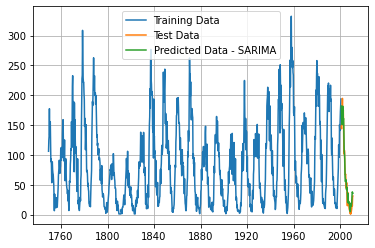

In [720]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [721]:
from math import sqrt
from sklearn.metrics import  mean_squared_error

In [722]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [723]:
rmse = sqrt(mean_squared_error(test.AvgSunspotCount,SARIMA_predictions))
print(rmse)

14.830307949496753


In [724]:
mape = MAPE(test.AvgSunspotCount,SARIMA_predictions)
print(mape)

105.53708878135373


In [725]:
resultsDf = pd.DataFrame({'Test RMSE': rmse, 'Test MAPE':mape}
                           ,index=['SARIMA(3, 0, 9)(1, 1, 1)43'])

resultsDf

,Test RMSE,Test MAPE
"SARIMA(3, 0, 9)(1, 1, 1)43",14.830308,105.537089


In [726]:
forecast= model_Sarima.forecast(79)

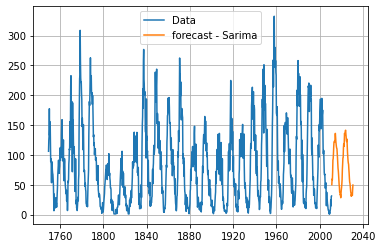

In [727]:
plt.plot(df_quarter,label='Data')
plt.plot(forecast,label='forecast - Sarima')
plt.legend(loc='best')
plt.grid();

In [728]:
forecast

2011-03-31    50.111143
2011-06-30    59.422477
2011-09-30    58.123724
2011-12-31    70.878153
2012-03-31    91.455807
                ...    
2029-09-30    31.732147
2029-12-31    35.202377
2030-03-31    32.084946
2030-06-30    41.684159
2030-09-30    49.359849
Freq: Q-DEC, Name: predicted_mean, Length: 79, dtype: float64

In [737]:
f = forecast.iloc[:41]

In [738]:
f

2011-03-31     50.111143
2011-06-30     59.422477
2011-09-30     58.123724
2011-12-31     70.878153
2012-03-31     91.455807
2012-06-30     93.480519
2012-09-30    101.323329
2012-12-31    113.399030
2013-03-31    121.385074
2013-06-30    121.645912
2013-09-30    123.258083
2013-12-31    121.839327
2014-03-31    126.670676
2014-06-30    135.995417
2014-09-30    129.331572
2014-12-31    121.982085
2015-03-31    117.630994
2015-06-30    113.576599
2015-09-30    111.144017
2015-12-31    110.130909
2016-03-31    102.412759
2016-06-30     95.291845
2016-09-30     85.606388
2016-12-31     77.224118
2017-03-31     73.421801
2017-06-30     66.807564
2017-09-30     58.796377
2017-12-31     50.502517
2018-03-31     45.941697
2018-06-30     37.630453
2018-09-30     37.593564
2018-12-31     32.921556
2019-03-31     33.689210
2019-06-30     28.116390
2019-09-30     35.514512
2019-12-31     41.283011
2020-03-31     44.988518
2020-06-30     50.895040
2020-09-30     58.654343
2020-12-31     75.241113


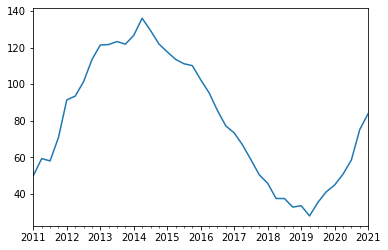

In [739]:
f_month = f.resample('1M').mean()
f.plot()
plt.show()

In [740]:
f_month

2011-03-31    50.111143
2011-04-30          NaN
2011-05-31          NaN
2011-06-30    59.422477
2011-07-31          NaN
                ...    
2020-11-30          NaN
2020-12-31    75.241113
2021-01-31          NaN
2021-02-28          NaN
2021-03-31    83.946565
Freq: M, Name: predicted_mean, Length: 121, dtype: float64

In [741]:
f_month=f_month.interpolate(method='linear', limit_direction='forward', axis=0)

In [742]:
f_month = f_month.iloc[1:]

In [743]:
f_month = pd.DataFrame(f_month)

In [744]:
f_month

,predicted_mean
2011-04-30,53.214921
2011-05-31,56.318699
2011-06-30,59.422477
2011-07-31,58.989560
2011-08-31,58.556642
...,...
2020-11-30,69.712190
2020-12-31,75.241113
2021-01-31,78.142930
2021-02-28,81.044748


In [745]:
f_month=f_month.rename(columns={"predicted_mean": "Predicted_value"})

In [746]:
f_month

,Predicted_value
2011-04-30,53.214921
2011-05-31,56.318699
2011-06-30,59.422477
2011-07-31,58.989560
2011-08-31,58.556642
...,...
2020-11-30,69.712190
2020-12-31,75.241113
2021-01-31,78.142930
2021-02-28,81.044748


In [747]:
f_month.to_csv('predicted_out')

In [748]:
pred = f_month.Predicted_value.values

In [749]:
pred

array([ 53.21492081,  56.31869902,  59.42247723,  58.98955954,
        58.55664185,  58.12372417,  62.37520039,  66.62667661,
        70.87815283,  77.73737072,  84.59658862,  91.45580652,
        92.13071075,  92.80561497,  93.4805192 ,  96.09478918,
        98.70905915, 101.32332913, 105.34856268, 109.37379622,
       113.39902977, 116.06104465, 118.72305953, 121.38507441,
       121.47202034, 121.55896627, 121.6459122 , 122.18330241,
       122.72069261, 123.25808281, 122.78516433, 122.31224585,
       121.83932737, 123.44977687, 125.06022636, 126.67067585,
       129.77892297, 132.88717009, 135.99541721, 133.77413557,
       131.55285393, 129.3315723 , 126.8817432 , 124.4319141 ,
       121.982085  , 120.53172134, 119.08135768, 117.63099402,
       116.27952912, 114.92806422, 113.57659931, 112.76573865,
       111.95487799, 111.14401734, 110.80631445, 110.46861156,
       110.13090868, 107.55819196, 104.98547523, 102.41275851,
       100.03912063,  97.66548274,  95.29184486,  92.06

In [750]:
d =pd.read_csv('S1.csv')

In [751]:
d

,Month,Avg_sunspot_count
0,01-01-2011,47.595490
1,02-01-2011,47.011347
2,03-01-2011,46.427205
3,04-01-2011,38.505031
4,05-01-2011,30.582856
...,...,...
115,08-01-2020,75.244538
116,09-01-2020,76.028163
117,10-01-2020,77.194783
118,11-01-2020,78.361402


In [752]:
d['Avg_sunspot_count'] = pred

In [753]:
d

,Month,Avg_sunspot_count
0,01-01-2011,53.214921
1,02-01-2011,56.318699
2,03-01-2011,59.422477
3,04-01-2011,58.989560
4,05-01-2011,58.556642
...,...,...
115,08-01-2020,69.712190
116,09-01-2020,75.241113
117,10-01-2020,78.142930
118,11-01-2020,81.044748


In [754]:
d.to_csv('predicted_out6.csv',index=False)

In [755]:
d.shape

(120, 2)

In [756]:
d.head(2)

,Month,Avg_sunspot_count
0,01-01-2011,53.214921
1,02-01-2011,56.318699


In [757]:
d.tail(2)

,Month,Avg_sunspot_count
118,11-01-2020,81.044748
119,12-01-2020,83.946565


In [758]:
d.isnull().sum()

Month                0
Avg_sunspot_count    0
dtype: int64